<h1 style="background-color:lightblue;padding:2rem;border-radius:5px;">K-means and Hierarchical Cluster Analysis</h1>

In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import decomposition, preprocessing, metrics

import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram

nb_groupes_de_points = 7
coordglob = np.array([[1, 1], [2, 1], [2, 2],[1, 2],
                [6, 6], [7, 6], [7, 7],[6, 7],
                [11, 1], [12, 1], [12, 2],[11, 2],
                 [16, 6], [17, 6], [17, 7],[16, 7],
                 [21, 1], [22, 1], [22, 2],[21, 2],
                [36, 16], [37, 16], [37, 17],[36, 17],
                [41, 1], [42, 1], [42, 2],[41, 2]])
coord = coordglob[:nb_groupes_de_points*4]
kmeans = KMeans(n_clusters=nb_groupes_de_points, random_state=0).fit(coord)
#kmeans = KMeans(n_clusters=4, random_state=0).fit(coord)
kmeans.labels_

print(kmeans.predict([[0, 0], [12, 3]]))

kmeans.cluster_centers_

[5 6]


array([[16.5,  6.5],
       [41.5,  1.5],
       [ 6.5,  6.5],
       [21.5,  1.5],
       [36.5, 16.5],
       [ 1.5,  1.5],
       [11.5,  1.5]])

In [2]:
coordglob[:12]

array([[ 1,  1],
       [ 2,  1],
       [ 2,  2],
       [ 1,  2],
       [ 6,  6],
       [ 7,  6],
       [ 7,  7],
       [ 6,  7],
       [11,  1],
       [12,  1],
       [12,  2],
       [11,  2]])

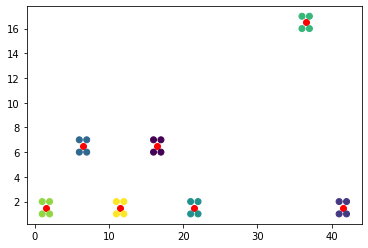

In [3]:
x = [i[0] for i in coord]
y = [i[1] for i in coord]
cx = [i[0] for i in kmeans.cluster_centers_]
cy = [i[1] for i in kmeans.cluster_centers_]
plt.scatter(cx,cy,c='red')
plt.scatter(x,y,c=kmeans.labels_)
plt.show()

In [4]:
kmeans.labels_

array([5, 5, 5, 5, 2, 2, 2, 2, 6, 6, 6, 6, 0, 0, 0, 0, 3, 3, 3, 3, 4, 4,
       4, 4, 1, 1, 1, 1])

<h2 style="background-color:lightblue;padding:2rem;border-radius:5px;">Determine the best clustering when labels are unknown</h2>

<h3 style="background-color:lightgrey;padding:2rem;border-radius:5px;">Elbow method (Méthode du coude)</h3>

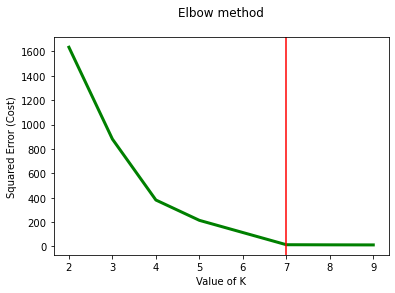

In [47]:
cost =[]
test_clusters = [i for i in range(2,nb_groupes_de_points+3)]
for i in test_clusters:
    #cls=KMeans(n_clusters=i,n_init=50,init='k-means++')
    cls = KMeans(n_clusters=i)
    cls.fit(coord)
    cost.append(cls.inertia_)    


plt.plot(test_clusters, cost, color ='g', linewidth ='3')
plt.title("Elbow method\n")
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.axvline(x=nb_groupes_de_points, ymin=0, ymax=1, color="red")
plt.show()

<h3 style="background-color:lightgrey;padding:2rem;border-radius:5px;">Indice Davies-Bouldin</h3>
<p></p>
<div style="border: solid black; padding:2rem; border-radius: 5px;">
    <ul>
        <li>un indice Davies-Bouldin inférieur se rapporte à un modèle avec une meilleure séparation entre les clusters</li>
        <li>Zéro est le score le plus bas possible. Des valeurs plus proches de zéro indiquent une meilleure partition.</li>
    </ul>
</div>

0.16841220545714045


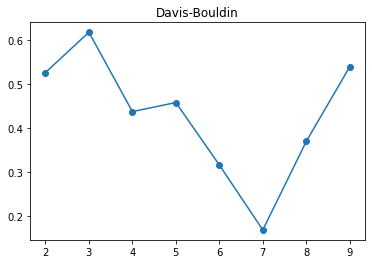

In [45]:
DB=[]
test_clusters = [i for i in range(2,nb_groupes_de_points+3)]
for num_clusters in test_clusters:
    cls = KMeans(n_clusters=num_clusters,n_init=50,init='k-means++') #Les deux options à la fin pour avoir une initialisation aléatoire et unique
    cls.fit(coord)
    db = metrics.davies_bouldin_score(coord,cls.labels_) #silhouette de X_norm étant donné le clustering de cls
    DB.append(db)

print(min(DB))
plt.plot(test_clusters,DB,marker='o')   # on choisi le score le plus haut (sauf 2 clusters)
plt.title('Davis-Bouldin')
plt.show()

<h3 style="background-color:lightgrey;padding:2rem;border-radius:5px;">Silhouette score</h3>
<p></p>
<div style="border: solid black; padding:2rem; border-radius: 5px;">
    <ul>Le Coefficient Silhouette est défini pour chaque échantillon et est composé de deux scores :
        <li>a : La distance moyenne entre un échantillon et tous les autres points de la même classe.</li>
        <li>b : La distance moyenne entre un échantillon et tous les autres points de la grappe la plus proche</li>
    </ul>
    <p>Le coefficient de silhouette pour un ensemble d'échantillons est donné comme la moyenne du coefficient de silhouette pour chaque échantillon.</p>
</div>

Max score : 0.86


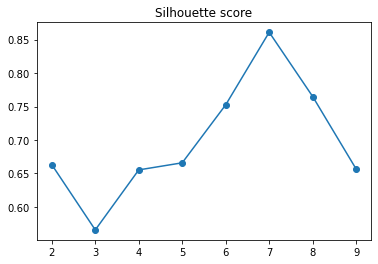

In [44]:
# score de silhouette
silhouettes=[]
test_clusters = [i for i in range(2,nb_groupes_de_points+3)]
for num_clusters in test_clusters:
  cls = KMeans(n_clusters=num_clusters,n_init=50,init='k-means++') #Les deux options à la fin pour avoir une initialisation aléatoire et unique
  cls.fit(coord)
  silh = metrics.silhouette_score(coord,cls.labels_) #silhouette de X_norm étant donné le clustering de cls
  silhouettes.append(silh)

print("Max score : {:.2}".format(max(silhouettes)))
plt.plot(test_clusters,silhouettes,marker='o')   # on choisi le score le plus haut (sauf 2 clusters)
plt.title('Silhouette score')
plt.show()

<h3 style="background-color:lightgrey;padding:2rem;border-radius:5px;">Indice Calinski-Harabasz</h3>
<p></p>
<div style="border: solid black; padding:2rem; border-radius: 5px;">
    <ul>
        <li>également connu sous le nom de critère du rapport de variance</li>
        <li>L'indice est le rapport de la somme de la dispersion inter-clusters et de la dispersion intra-cluster pour tous les clusters</li>
    </ul>
</div>

1528.5714285714284


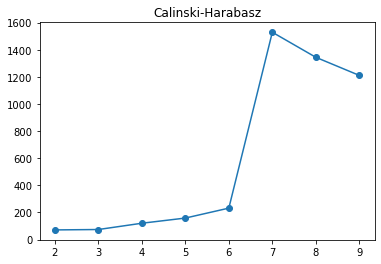

In [39]:
calinski=[]
test_clusters = [i for i in range(2,nb_groupes_de_points+3)]
for num_clusters in test_clusters:
    cls = KMeans(n_clusters=num_clusters,n_init=50,init='k-means++') #Les deux options à la fin pour avoir une initialisation aléatoire et unique
    cls.fit(coord)
    cali = metrics.calinski_harabasz_score(coord,cls.labels_) #silhouette de X_norm étant donné le clustering de cls
    calinski.append(cali)

print(max(calinski))
plt.plot(test_clusters,calinski,marker='o')   # on choisi le score le plus haut (sauf 2 clusters)
plt.title("Calinski-Harabasz")
plt.show()

<h2 style="background-color:lightblue;padding:2rem;border-radius:5px;">Hierarchical Cluster Analysis (HCA)</h2>

In [9]:
ward = AgglomerativeClustering(linkage='ward',compute_full_tree=True).fit(coord)

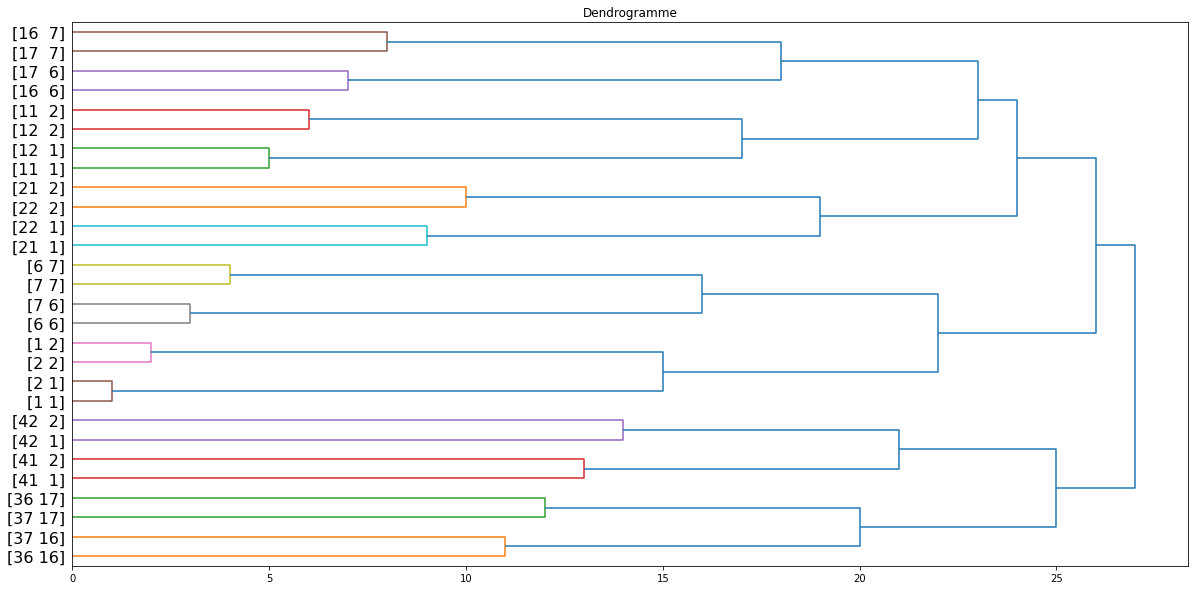

In [10]:
labels_str = [str(i) for i in coord] #Transformation des coordonnées des points en str \\
#pour éviter tout problème d'interprétation de format

dendro = [ ]
for a,b in ward.children_:
    dendro.append([a, b, float(len(dendro)+1), len(dendro)+1])

plt.figure(figsize=(20, 10) )
dendrogram(dendro,color_threshold=15,labels=labels_str,
           show_leaf_counts=True,orientation="right", leaf_font_size=16)
plt.title("Dendrogramme")
plt.show()

<h2 style="background-color:lightblue;padding:2rem;border-radius:5px;">DBSCAN</h2>

In [12]:
from sklearn.cluster import DBSCAN

In [35]:
#Deux paramètres importants:
#eps : La distance maximale entre deux échantillons pour que l'un soit considéré comme voisin de l'autre.
#min_samples : Le nombre d'échantillons (ou poids total) dans un voisinage pour qu'un point soit considéré comme un point central. 
    #Cela inclut le point lui-même.
dbs = DBSCAN(eps=3, min_samples=2).fit(coord)
dbs.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5,
       5, 5, 6, 6, 6, 6], dtype=int64)

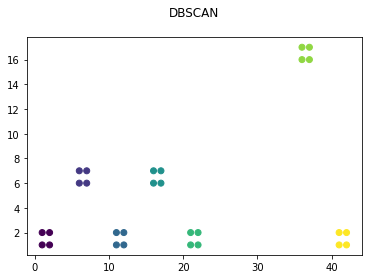

In [38]:
x = [i[0] for i in coord]
y = [i[1] for i in coord]
plt.scatter(x,y,c=dbs.labels_)
plt.title('DBSCAN\n')
plt.show()